#### Notebook to compare the significant top singals by cell-type

note I'm only looking at iDA, DA, and lNP, not all the types quantified

- 'Immature Dopaminergic Neurons': 'iDA', 
- 'Dopaminergic Neurons': 'DA', 
- 'Proliferating Floor Plate Progenitors': 'PFPP', 
- 'Early neuron Progenitor': 'eNP', 
- 'Ependymal-like Cells': 'ElC', 
- 'Late neuron Progenitor': 'lNP', 
- 'Neuroepithelial-like Cells': 'NlC'

In [1]:
!date

Thu Aug  5 22:15:21 UTC 2021


#### import libraries and set notebook variables

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import concurrent.futures
import os

In [28]:
# parameters
cohort = 'foundin'
day = 'da65'

# naming
# cohort_build = f'{cohort}.{day}'

# directories
wrk_dir = f'/home/jupyter/sceqtl'
tensorqtl_dir = f'{wrk_dir}/tensorqtl'
results_dir = f'{wrk_dir}/results'

# input files

# out files
top_results_file = f'{results_dir}/{cohort}.{day}.cis.csv'

# constants
alpha_value = 0.05
cell_types = ['iDA', 'DA', 'lNP']
autosomes = [str(x) for x in list(range(1,23))]
cpu_count = len(os.sched_getaffinity(0))

#### load the results

In [4]:
# load the full map results
tops_df = None
for cell_type in cell_types:
    cohort_build = f'{cohort}.{day}.{cell_type}'
    cis_map_file = f'{tensorqtl_dir}/{cohort_build}.cis.map.csv'
    cell_df = pd.read_csv(cis_map_file)
    feature_cnt = len(cell_df['phenotype_id'].unique())
    print(f'{cell_type} shape is {cell_df.shape} for {feature_cnt} features')
    cell_df['cell_type'] = cell_type
    tops_df = pd.concat([tops_df, cell_df])
    print(f'after {cell_type} total shape {tops_df.shape}')

iDA shape is (10115, 17) for 10115 features
after iDA total shape (10115, 18)
DA shape is (10589, 17) for 10589 features
after DA total shape (20704, 18)
lNP shape is (9864, 17) for 9864 features
after lNP total shape (30568, 18)


In [5]:
print(tops_df.shape)
display(tops_df.sample(5))

(30568, 18)


,phenotype_id,num_var,beta_shape1,beta_shape2,true_df,pval_true_df,variant_id,tss_distance,ma_samples,ma_count,af,pval_nominal,slope,slope_se,pval_perm,pval_beta,bh_fdr,cell_type
1481,C1orf131,6870,2.009355,622.06790,37.586494,0.005757,rs115684722,999230,3,4,0.025316,0.000073,-0.195321,0.046599,0.913109,0.872469,0.999521,DA
8655,TCN2,5414,1.685425,181.06718,32.789505,0.006652,rs118035996,-765666,3,4,0.025316,0.000030,-0.200264,0.045100,0.653035,0.443684,0.722205,DA
8228,LRPAP1,8230,1.502529,455.36517,36.948980,0.001598,rs529121691,328226,2,2,0.012658,0.000005,-0.383737,0.078018,0.574543,0.306863,0.685488,DA
4272,DALRD3,2888,0.969961,35.84530,32.091830,0.034371,rs34261514,686215,33,37,0.234177,0.000995,-0.083785,0.024477,0.714329,0.725641,0.918128,DA
9334,ZNF33B,6019,1.188793,76.11676,26.336746,0.027034,rs76853762,-805035,2,2,0.012658,0.000142,-0.288537,0.072066,0.808719,0.834737,0.982880,iDA


In [9]:
tops_df['cell_type'].value_counts()

DA     10589
iDA    10115
lNP     9864
Name: cell_type, dtype: int64

#### make a key for the variant/pheno pair

In [10]:
tops_df['cispair'] = tops_df['phenotype_id'] + ':' + tops_df['variant_id']
print(tops_df.shape)
display(tops_df.sample(5))

(30568, 19)


,phenotype_id,num_var,beta_shape1,beta_shape2,true_df,pval_true_df,variant_id,tss_distance,ma_samples,ma_count,af,pval_nominal,slope,slope_se,pval_perm,pval_beta,bh_fdr,cell_type,cispair
2518,ATAD3A,4933,1.314788,219.72278,30.858570,0.001779,rs577198193,-676137,1,1,0.006329,7.068970e-07,0.553632,0.102466,0.452155,0.199356,0.676900,lNP,ATAD3A:rs577198193
6275,TMEM176B,6317,2.023314,810.34110,40.707745,0.001529,rs10230657,-2237,54,73,0.462025,1.237792e-05,0.077492,0.016582,0.579242,0.345155,0.685488,DA,TMEM176B:rs10230657
7464,IARS,6912,1.679468,210.49695,29.024450,0.013803,rs975863240,-655531,2,3,0.018987,5.534779e-05,-0.197548,0.046271,0.838016,0.851417,0.988499,DA,IARS:rs975863240
4751,COX14,4425,1.503020,136.82457,34.667920,0.034014,rs706790,-41292,53,71,0.449367,1.515154e-03,-0.059208,0.017999,0.951805,0.976410,1.000000,iDA,COX14:rs706790
6416,PC,3848,1.044784,345.76764,72.716090,0.001551,rs72936674,-728390,10,10,0.063291,1.123884e-03,0.210392,0.062160,0.399360,0.393670,0.692416,lNP,PC:rs72936674


In [11]:
tops_df['cispair'].value_counts().value_counts()

1    26867
2     1558
3      195
Name: cispair, dtype: int64

In [12]:
tops_df['cell_type'].value_counts()

DA     10589
iDA    10115
lNP     9864
Name: cell_type, dtype: int64

In [13]:
len(tops_df['cispair'].unique())

28620

#### what is the max p-value in the independent signals

In [15]:
sig_tops_df = tops_df.loc[tops_df['bh_fdr'] < alpha_value]
feature_cnt = len(sig_tops_df['phenotype_id'].unique())
print(f'sig any cell shape is {sig_tops_df.shape} for {feature_cnt} features')

max_pvalue = sig_tops_df['pval_nominal'].max()
print(f'max nominal pvalue {max_pvalue}')

sig any cell shape is (198, 19) for 127 features
max nominal pvalue 1.253248739829989e-07


In [16]:
sig_tops_df['cispair'].value_counts().value_counts()

1    125
2     29
3      5
Name: cispair, dtype: int64

In [17]:
sig_tops_df['cell_type'].value_counts()

lNP    83
DA     64
iDA    51
Name: cell_type, dtype: int64

#### now that all the cispairs of interest are known get complete data for these

In [19]:
def load_missing_qtl_results(find_items: list, in_file: str, 
                             cell: str) -> pd.DataFrame:
    qtl_df = pd.read_parquet(in_file)
    qtl_df['cispair'] = qtl_df['phenotype_id'] + ':' + qtl_df['variant_id']
    found_df = qtl_df.loc[qtl_df['cispair'].isin(find_items)].copy()
    found_df['cell_type'] = cell
    return found_df

In [20]:
%%time

fs_list = []
lm_results = []
with concurrent.futures.ThreadPoolExecutor() as tpe:
    for cell_type in cell_types:
        cohort_build = f'{cohort}.{day}.{cell_type}'
        for chrom in autosomes:
            this_result_file = f'{tensorqtl_dir}/{cohort_build}.cis_qtl_pairs.chr{chrom}.parquet'
            fs_list.append(tpe.submit(load_missing_qtl_results, sig_tops_df['cispair'], 
                                      this_result_file, cell_type))
for future in concurrent.futures.as_completed(fs_list):
    lm_results.append(future.result())    

CPU times: user 1min 50s, sys: 32.8 s, total: 2min 23s
Wall time: 1min 28s


In [29]:
# combine the read results
results_df = pd.concat(lm_results)
print(results_df.shape)
display(results_df.sample(10))

(439, 11)


,phenotype_id,variant_id,tss_distance,af,ma_samples,ma_count,pval_nominal,slope,slope_se,cispair,cell_type
102553,ZNF593,rs8768,978,0.253165,35,40,1.012268e-07,0.108364,0.018440,ZNF593:rs8768,DA
2855451,STAG3L4,rs7341400,15871,0.398734,52,63,4.349964e-13,-0.131852,0.015138,STAG3L4:rs7341400,DA
101241,KANSL1-AS1,rs1378358,516373,0.221519,31,35,1.059932e-10,0.138418,0.018530,KANSL1-AS1:rs1378358,iDA
3180411,lnc-NADSYN1-1,rs1981412,-20876,0.360759,50,57,3.035792e-15,-0.135037,0.013736,lnc-NADSYN1-1:rs1981412,iDA
1798720,XRRA1,rs77182701,-102560,0.246835,34,39,2.673257e-12,0.136597,0.016455,XRRA1:rs77182701,iDA
1301106,SETD9,rs252910,-12104,0.196203,29,31,4.491307e-09,-0.127939,0.019353,SETD9:rs252910,iDA
2262169,PILRB,rs7795656,498,0.227848,36,36,8.504897e-11,0.154122,0.020496,PILRB:rs7795656,iDA
1143067,ZNF880,rs4802926,7095,0.373418,44,59,3.768064e-19,0.156749,0.013157,ZNF880:rs4802926,lNP
359667,RPS26,rs1131017,794,0.417722,51,66,2.087974e-19,0.140397,0.011647,RPS26:rs1131017,lNP
2626248,CCDC58,rs35780274,-108604,0.468354,59,74,9.202913e-09,0.105715,0.016406,CCDC58:rs35780274,iDA


In [30]:
results_df['cispair'].value_counts().value_counts()

3    135
1     14
2     10
Name: cispair, dtype: int64

In [32]:
results_df['cell_type'].value_counts()

DA     149
iDA    148
lNP    142
Name: cell_type, dtype: int64

In [33]:
results_df['log10_pvalue'] = np.log10(results_df['pval_nominal'])*-1
results_df['score'] = results_df['slope']/results_df['slope_se']
results_df['score_abs'] = np.abs(results_df['score'])
results_df['is_sig'] = 0
results_df.loc[results_df['pval_nominal'] < max_pvalue, 'is_sig'] = 1

In [34]:
results_df.sample(5)

,phenotype_id,variant_id,tss_distance,af,ma_samples,ma_count,pval_nominal,slope,slope_se,cispair,cell_type,log10_pvalue,score,score_abs,is_sig
543749,LIN52,rs11622838,117860,0.316456,44,50,3.066228e-08,0.112928,0.018330,LIN52:rs11622838,lNP,7.513396,6.160954,6.160954,1
119711,EP400P1,rs7297253,-168,0.177215,26,28,2.436006e-03,-0.078429,0.025021,EP400P1:rs7297253,DA,2.613322,-3.134563,3.134563,0
2789880,ZNF880,rs4802926,7095,0.373418,44,59,5.645265e-08,0.113205,0.018817,ZNF880:rs4802926,iDA,7.248316,6.016075,6.016075,1
697007,C17orf97,rs11150881,-814,0.234177,35,37,7.917690e-04,0.081261,0.023256,C17orf97:rs11150881,lNP,3.101402,3.494185,3.494185,0
960527,SIGIRR,rs7479832,-13516,0.164557,23,26,5.029450e-07,0.118562,0.021607,SIGIRR:rs7479832,lNP,6.298480,5.487070,5.487070,0


In [35]:
results_df['is_sig'].value_counts()

1    318
0    121
Name: is_sig, dtype: int64

#### save the combined results

In [36]:
results_df.to_csv(top_results_file, index=False)

In [37]:
temp = results_df.groupby(['cispair'])['is_sig'].agg('sum')
display(results_df.loc[results_df['is_sig'] == 0].head())
display(temp.value_counts())

,phenotype_id,variant_id,tss_distance,af,ma_samples,ma_count,pval_nominal,slope,slope_se,cispair,cell_type,log10_pvalue,score,score_abs,is_sig
697007,C17orf97,rs11150881,-814,0.234177,35,37,0.000792,0.081261,0.023256,C17orf97:rs11150881,lNP,3.101402,3.494185,3.494185,0
1717935,SRR,rs1885987,-3652,0.360759,49,57,0.000035,-0.086501,0.019667,SRR:rs1885987,lNP,4.461398,-4.398355,4.398355,0
1242171,lnc-MEX3B-4,rs28541667,-62992,0.436709,58,69,0.000007,-0.094522,0.019609,lnc-MEX3B-4:rs28541667,lNP,5.151516,-4.820409,4.820409,0
488346,PPIL2,rs2070504,28472,0.398734,47,63,0.000308,0.060741,0.016070,PPIL2:rs2070504,lNP,3.511486,3.779697,3.779697,0
617107,FAM227A,rs3788545,12538,0.329114,42,52,0.022447,0.045511,0.019536,FAM227A:rs3788545,lNP,1.648838,2.329649,2.329649,0


1    58
3    58
2    43
Name: is_sig, dtype: int64

In [38]:
temp[temp == 0].head()

Series([], Name: is_sig, dtype: int64)

In [39]:
results_df.groupby(['cispair'])['is_sig'].agg('sum').value_counts()

1    58
3    58
2    43
Name: is_sig, dtype: int64

#### for the stuff that isn't in largest powered group any visit standout

In [40]:
results_df.loc[results_df['cell_type'] != 0]['cell_type'].value_counts()

DA     149
iDA    148
lNP    142
Name: cell_type, dtype: int64

In [41]:
results_df.loc[results_df['cell_type'] != 0].groupby(['cispair'])['is_sig'].agg('sum').value_counts()

1    58
3    58
2    43
Name: is_sig, dtype: int64

#### annotate direction of effect for plotting

In [42]:
results_df['Direction'] = np.where(results_df['slope'] > 0, 
                                         'Increase', 'Descrease')
display(results_df.sample(5))

,phenotype_id,variant_id,tss_distance,af,ma_samples,ma_count,pval_nominal,slope,slope_se,cispair,cell_type,log10_pvalue,score,score_abs,is_sig,Direction
995595,SNHG17,rs707578,-8131,0.189873,25,30,2.075990e-10,0.133393,0.018231,SNHG17:rs707578,lNP,9.682775,7.316984,7.316984,1,Increase
853917,FAM227A,rs3788545,12538,0.329114,42,52,3.369395e-09,0.108272,0.016214,FAM227A:rs3788545,DA,8.472448,6.677496,6.677496,1,Increase
782226,EXOSC6,rs73575193,11735,0.443038,56,70,4.028343e-07,0.096084,0.017339,EXOSC6:rs73575193,DA,6.394874,5.541564,5.541564,0,Increase
1604916,CHURC1,rs3033504,11463,0.259494,36,41,3.136082e-14,0.144461,0.015529,CHURC1:rs3033504,DA,13.503613,9.302535,9.302535,1,Increase
1803000,MXRA7,rs11869629,-29942,0.227848,32,36,1.491789e-08,0.156676,0.024749,MXRA7:rs11869629,lNP,7.826293,6.330695,6.330695,1,Increase


#### do some quick plotting

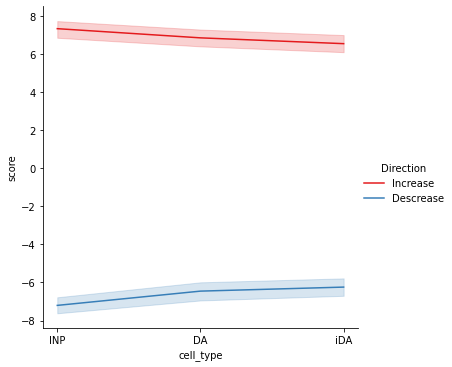

In [43]:
sns.relplot(x='cell_type', y='score', kind='line', hue='Direction',
            data=results_df, palette='Set1')

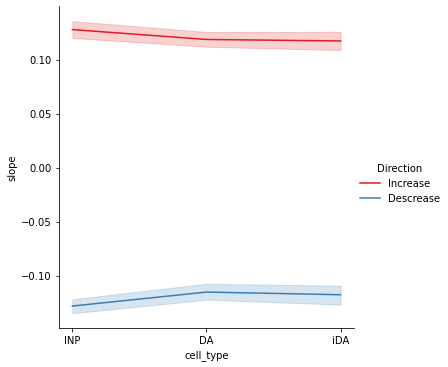

In [44]:
sns.relplot(x='cell_type', y='slope', kind='line', hue='Direction',
            data=results_df, palette='Set1')

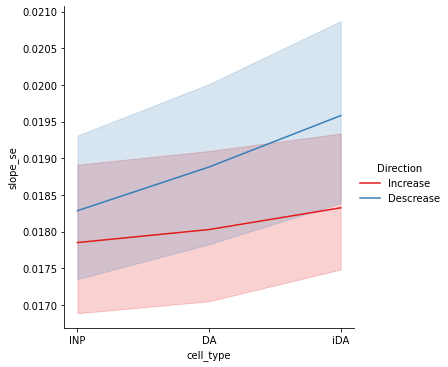

In [45]:
sns.relplot(x='cell_type', y='slope_se', kind='line', hue='Direction',
            data=results_df, palette='Set1')

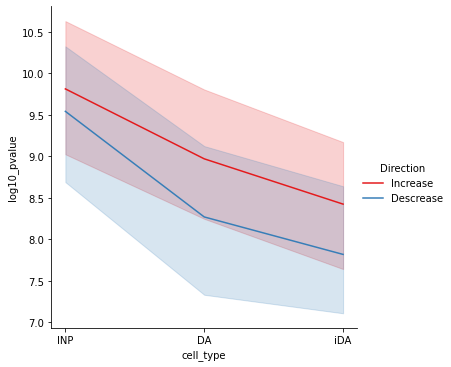

In [46]:
sns.relplot(x='cell_type', y='log10_pvalue', kind='line', hue='Direction',
            data=results_df, palette='Set1')

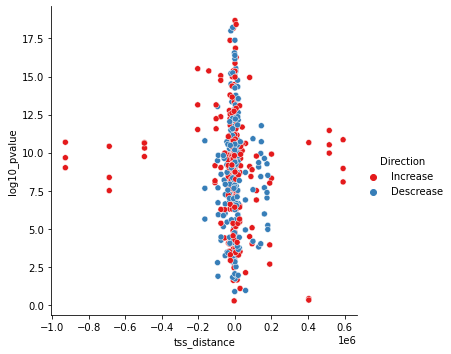

In [47]:
sns.relplot(x='tss_distance', y='log10_pvalue',hue='Direction',
            data=results_df, palette='Set1')

<AxesSubplot:xlabel='tss_distance', ylabel='log10_pvalue'>

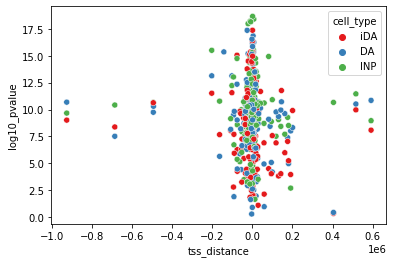

In [48]:
sns.scatterplot(x='tss_distance', y='log10_pvalue', hue='cell_type',
                data=results_df.sample(frac=1), palette='Set1')

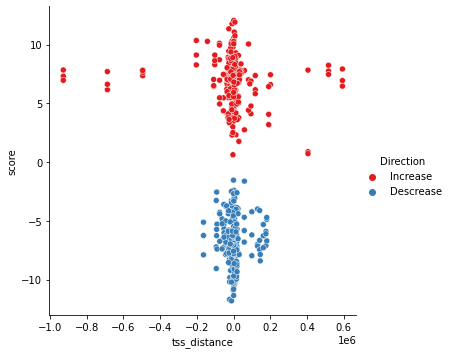

In [49]:
sns.relplot(x='tss_distance', y='score',hue='Direction',
            data=results_df, palette='Set1')

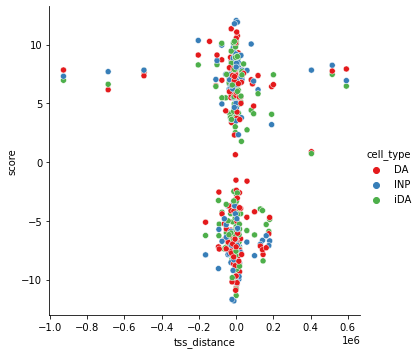

In [50]:
sns.relplot(x='tss_distance', y='score',hue='cell_type',
            data=results_df.sample(frac=1), palette='Set1')

#### format data for ternary plots

In [71]:
lNP = results_df.loc[results_df['cell_type'] == 'lNP'].sort_values(by=['cispair'])
iDA = results_df.loc[results_df['cell_type'] == 'iDA'].sort_values(by=['cispair'])
DA = results_df.loc[results_df['cell_type'] == 'DA'].sort_values(by=['cispair'])

In [72]:
all_df = lNP.merge(iDA, how='left', left_on='cispair', right_on='cispair')
all_df = all_df.merge(DA, how='left', left_on='cispair', right_on='cispair')
display(all_df.head())

,phenotype_id_x,variant_id_x,tss_distance_x,af_x,ma_samples_x,ma_count_x,pval_nominal_x,slope_x,slope_se_x,cispair,...,ma_count,pval_nominal,slope,slope_se,cell_type,log10_pvalue,score,score_abs,is_sig,Direction
0,AMH,rs4807216,-625,0.196203,26,31,1.325865e-08,-0.118045,0.018565,AMH:rs4807216,...,31.0,4.674519e-10,-0.130876,0.018351,DA,9.330263,-7.131813,7.131813,1.0,Descrease
1,ARL16,rs113250157,-16413,0.164557,24,26,4.521106e-14,-0.137004,0.014859,ARL16:rs113250157,...,26.0,1.128039e-08,-0.124864,0.019522,DA,7.947676,-6.396204,6.396204,1.0,Descrease
2,ARSA,rs2071421,-2185,0.132911,20,21,4.168698e-09,-0.157225,0.023721,ARSA:rs2071421,...,21.0,7.501098e-04,-0.094404,0.026889,DA,3.124875,-3.510900,3.510900,0.0,Descrease
3,ATP23,rs71084800,24231,0.272152,37,43,4.117947e-11,-0.130283,0.016955,ATP23:rs71084800,...,43.0,1.761454e-04,-0.077062,0.019545,DA,3.754129,-3.942804,3.942804,0.0,Descrease
4,BCR,rs140509,130321,0.329114,42,52,8.610580e-10,-0.112132,0.016037,BCR:rs140509,...,52.0,4.440432e-10,-0.111005,0.015539,DA,9.352575,-7.143556,7.143556,1.0,Descrease


#### clean up the column names

In [73]:
all_df.rename(columns={'score_abs_x': 'lNP', 'score_abs_y': 'iDA', 
                       'score_abs': 'DA'}, inplace=True)

In [74]:
all_df.fillna(0, inplace=True)

#### merge the counts for number days significant

In [75]:
all_df['cells_detected'] = all_df['is_sig_x'] + all_df['is_sig_y'] + all_df['is_sig']
# all_df = all_df.merge(counts, how='left', left_on='cispair', right_index=True)
# all_df.rename(columns={'cispair_y': 'days_detected'}, inplace=True)
all_df['cells_detected'].value_counts()

3.0    58
1.0    45
2.0    39
Name: cells_detected, dtype: int64

In [76]:
all_df['cells_detected'] = all_df['cells_detected'].astype('int')
all_df['cells_detected'].value_counts()

3    58
1    45
2    39
Name: cells_detected, dtype: int64

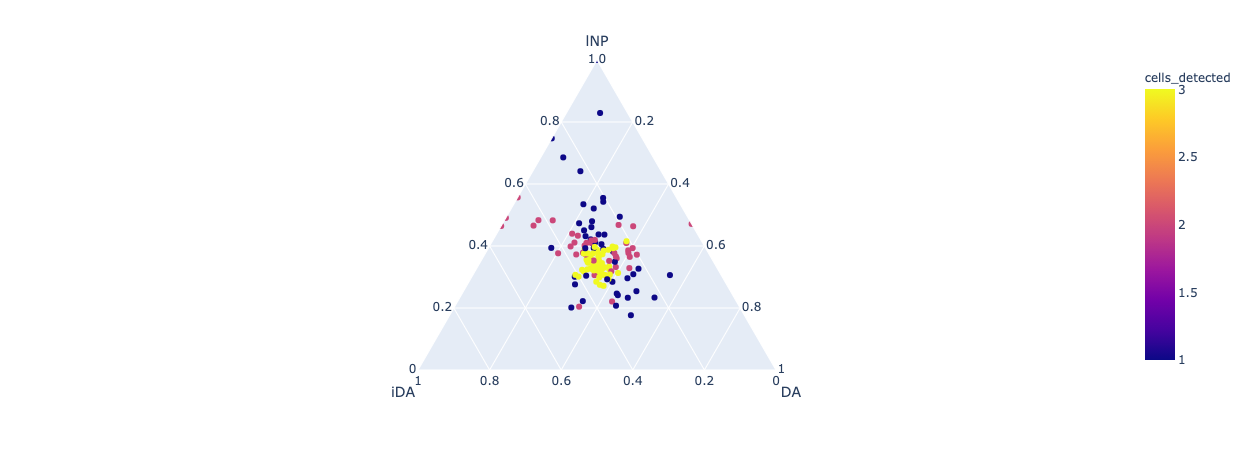

In [77]:
import plotly.express as px
fig = px.scatter_ternary(all_df, a='lNP', b='iDA', c='DA', color='cells_detected')
fig.show()

In [80]:
present_all = sig_tops_df['cispair'].value_counts()
present_all = present_all[present_all == 3]
present_all

CHURC1:rs3033504         3
RPS26:rs1131017          3
lnc-CTSV-5:rs10817286    3
DNAJC15:rs17553284       3
CRYBB2P1:rs1930961       3
Name: cispair, dtype: int64

In [82]:
tops_present_all = sig_tops_df.loc[sig_tops_df['cispair'].isin(present_all.index)]
print(tops_present_all.shape)
display(tops_present_all.head())

(15, 19)


,phenotype_id,num_var,beta_shape1,beta_shape2,true_df,pval_true_df,variant_id,tss_distance,ma_samples,ma_count,af,pval_nominal,slope,slope_se,pval_perm,pval_beta,bh_fdr,cell_type,cispair
1717,DNAJC15,6622,1.818367,737.479900,42.765396,1.116823e-10,rs17553284,367,28,31,0.196203,4.106490e-18,-0.175959,0.015501,0.0001,7.718067e-14,2.602275e-10,iDA,DNAJC15:rs17553284
3359,lnc-CTSV-5,4646,1.635512,184.315250,34.630554,1.907975e-08,rs10817286,87,60,73,0.462025,4.061259e-17,-0.149698,0.013837,0.0001,8.211513e-10,9.228828e-07,iDA,lnc-CTSV-5:rs10817286
3700,RPS26,4489,1.767290,247.783600,34.680607,5.499207e-08,rs1131017,794,51,66,0.417722,4.389865e-16,0.128515,0.012511,0.0001,1.547566e-09,1.488816e-06,iDA,RPS26:rs1131017
4219,CRYBB2P1,6043,2.106349,2614.930700,52.633526,4.905569e-08,rs1930961,31193,10,11,0.069620,3.921065e-11,0.223359,0.029026,0.0001,2.870463e-09,2.419561e-06,iDA,CRYBB2P1:rs1930961
4373,CHURC1,6151,1.307624,116.046524,35.364532,7.329501e-07,rs3033504,11463,36,41,0.259494,2.234001e-13,0.165595,0.018690,0.0001,4.067781e-06,1.645824e-03,iDA,CHURC1:rs3033504


#### get those that are only DA

In [84]:
da_only_genes = set(DA.loc[DA['is_sig'] == 1]['phenotype_id'].unique()) - \
                     (set(iDA.loc[iDA['is_sig'] == 1]['phenotype_id'].unique()) | 
                      set(lNP.loc[lNP['is_sig'] == 1]['phenotype_id'].unique()))
print(len(da_only_genes))
print(da_only_genes)

22
{'TMEM50B', 'PTPRD-AS1', 'FAM184B', 'lnc-CDC27-1', 'PPIL2', 'AC007751.2', 'FAM227A', 'COMMD10', 'SIGIRR', 'CERK', 'lnc-IDI1-2', 'FRA10AC1', 'lnc-SCRN3-1', 'TIMM23B', 'MYOM2', 'CCDC25', 'lnc-TUBGCP6-5', 'lnc-SNX10-2', 'PHOSPHO2', 'SRR', 'lnc-TUBB2A-7', 'POMZP3'}


#### get those that are only iDA

In [85]:
da_only_genes = set(iDA.loc[iDA['is_sig'] == 1]['phenotype_id'].unique()) - \
                     (set(DA.loc[DA['is_sig'] == 1]['phenotype_id'].unique()) | 
                      set(lNP.loc[lNP['is_sig'] == 1]['phenotype_id'].unique()))
print(len(da_only_genes))
print(da_only_genes)

10
{'TTC32', 'RPH3AL', 'TRAPPC2L', 'ZG16B', 'lnc-MEX3B-4', 'MPC1', 'ENTPD4', 'lnc-UNCX-3', 'lnc-HMX1-5', 'C17orf97'}


#### get those that are only lNP

In [86]:
da_only_genes = set(lNP.loc[lNP['is_sig'] == 1]['phenotype_id'].unique()) - \
                     (set(iDA.loc[iDA['is_sig'] == 1]['phenotype_id'].unique()) | 
                      set(DA.loc[DA['is_sig'] == 1]['phenotype_id'].unique()))
print(len(da_only_genes))
print(da_only_genes)

24
{'NDUFV3', 'CCDC32', 'NPRL3', 'ATP23', 'LINC02482', 'lnc-TOX4-4', 'MFSD4B', 'DECR2', 'BTN2A2', 'TMEM38B', 'lnc-CCDC28A-1', 'FAHD1', 'ARSA', 'lnc-CUL2-3', 'lnc-TNK2-2', 'ZNF584', 'FMN2', 'PIGP', 'MICA', 'SPATA20', 'NDUFAF1', 'TIMM10', 'EP400P1', 'MRPL42'}
